In [1]:
import numpy as np
import mne
import pandas as pd
import sys

import csv
from scipy.stats import skew, kurtosis
import pyeeg as p
from numpy import nan
import math

In [2]:
def mean_PSD(data):
    data.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)

In [3]:
def mean_variance(df):
    variance_vals = np.var(df)
    return np.mean(variance_vals)

In [4]:
def mean_kurtosis(df):
    kurtosis_vals = kurtosis(df)
    return np.mean(kurtosis_vals)

In [5]:
def mean_skewness(df):
    skew_vals = skew(df)
    return np.mean(skew_vals)

In [6]:
def func_mean_hurst(df):
    hurst_vals = []
    for col in df.columns:
        col = df[col].to_numpy()
        h_val = p.hurst(col)
        hurst_vals.append(h_val)
    return np.mean(hurst_vals)

In [7]:
def mean_pfd(df):
    pfd_vals = []
    for col in df.columns:
        col = df[col].to_numpy()
        pfd_val = p.pfd(col)
        pfd_vals.append(pfd_val)
    return np.mean(pfd_vals)

In [8]:
def mean_hjorth_mob_comp(df):
    mob_vals = []
    comp_vals = []
    for col in df.columns:
        col = df[col].to_numpy()
        mob_col, comp_col = p.hjorth(col)
        mob_vals.append(mob_col)
        comp_vals.append(comp_col)
    return np.mean(mob_vals), np.mean(comp_vals)

In [ ]:
def add_row(df, start, end):
    row_to_add = []
    d = df.loc[(df['time'] >= start) & (df['time'] < end)]
    
    mean_var = mean_variance(d)
    mean_k = mean_kurtosis(d)
    mean_skew = mean_skewness(d)
    #hurst = func_mean_hurst(d)
    pfd = mean_pfd(d)
    h_mob, h_comp = mean_hjorth_mob_comp(df)
    
    row_to_add.append(mean_var)
    row_to_add.append(mean_k)
    row_to_add.append(mean_skew)
    #row_to_add.append(hurst)
    row_to_add.append(pfd)
    row_to_add.append(h_mob)
    row_to_add.append(h_comp)
    row_to_add.append(1)
    
    
    return row_to_add

Extracting EDF parameters from C:\Users\DELL\Desktop\BTP_Final\BTP_Seizure_Pred\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-10-d63695b56a36>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf('chb01_04.edf', preload=True)


Effective window size : 8.000 (s)


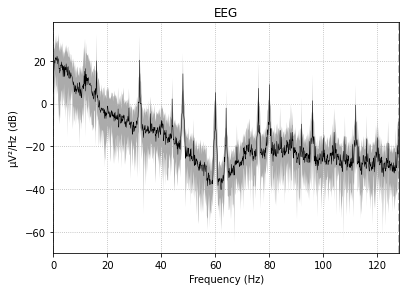

In [10]:
data = mne.io.read_raw_edf('chb01_04.edf', preload=True)
df = data.to_data_frame()
mean_PSD(data)

In [ ]:
#processes one seizure in 10s windows
#adds rows with features extracted from these windows
start = temp = 1467 
duration = 10
end = 1494 

res = pd.DataFrame()
while temp < end:
    row = add_row(df, temp, temp + duration)
    res=res.append(pd.Series(row),ignore_index=True)
    temp += duration
    
res